In [16]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [39]:
df = pd.DataFrame()

In [40]:
y.shape

(100,)

In [46]:
df['X'] = X.reshape(100)
df['y'] = y

In [47]:
df

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


Text(0.5, 1.0, 'X vs Y')

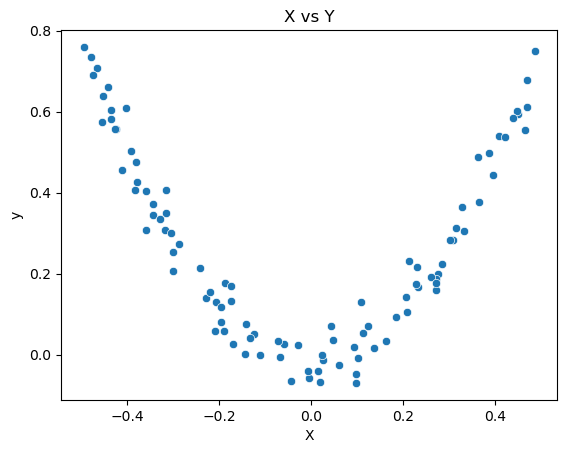

In [50]:
sns.scatterplot(x='X', y='y', data=df)
plt.title('X vs Y')

In [52]:
df['pred1'] = df['y'].mean()

In [54]:
df

,X,y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


In [56]:
df['res1'] = df['y'] - df['pred1']

In [58]:
df

,X,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


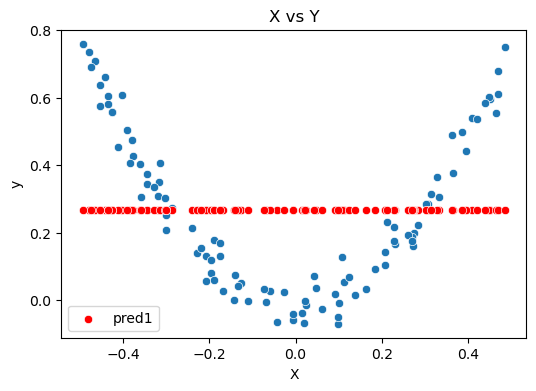

In [64]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='X', y='y', data=df)
sns.scatterplot(x='X', y='pred1', data=df, color='red', label='pred1')
plt.title('X vs Y')
plt.legend()

In [71]:
from sklearn.tree import DecisionTreeRegressor

tree1 = DecisionTreeRegressor(max_leaf_nodes=8)



In [77]:
X = df['X'].values.reshape(100, 1)
y = df.res1

In [83]:
tree1.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=8)

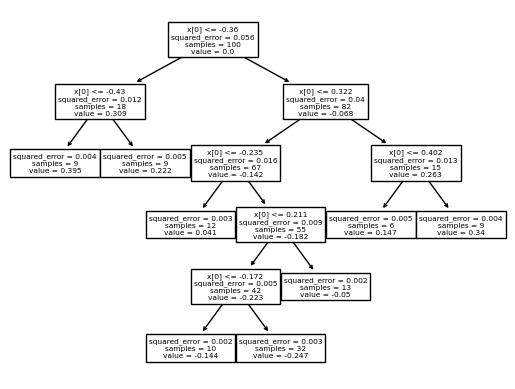

In [84]:

from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()
     

In [88]:
# generating X_test
X_test = np.linspace(-0.5, 0.5, 500)
X_test.shape

(500,)

In [90]:
y_pred = 0.265458 + tree1.predict(X_test.reshape(500, 1))
     

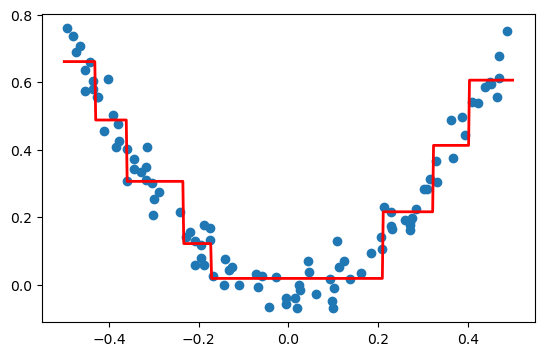

In [92]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])

In [100]:
df['pred2'] =  0.265458  + tree1.predict(df['X'].values.reshape(100,1))
df

,X,y,pred1,res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319
1,0.450714,0.594480,0.265458,0.329021,0.605884
2,0.231994,0.166052,0.265458,-0.099407,0.215784
3,0.098658,-0.070178,0.265458,-0.335636,0.018319
4,-0.343981,0.343986,0.265458,0.078528,0.305964
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319
96,0.022733,-0.002305,0.265458,-0.267763,0.018319
97,-0.072459,0.032809,0.265458,-0.232650,0.018319
98,-0.474581,0.689516,0.265458,0.424057,0.660912


In [103]:
df['res2'] = df['y'] - df['pred2']
df

,X,y,pred1,res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319,0.033254
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018319,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305964,0.038022
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319,-0.058994
96,0.022733,-0.002305,0.265458,-0.267763,0.018319,-0.020624
97,-0.072459,0.032809,0.265458,-0.232650,0.018319,0.014489
98,-0.474581,0.689516,0.265458,0.424057,0.660912,0.028604


In [112]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)
tree2.fit(df.X.values.reshape(100, 1), df.res2)

DecisionTreeRegressor(max_leaf_nodes=8)

In [116]:
X_test.reshape(-1, 1).shape

(500, 1)

In [117]:
y_pred = 0.265458 + sum(regressor.predict(X_test.reshape(-1, 1)) for regressor in [tree1,tree2])

Text(0.5, 1.0, 'X vs y')

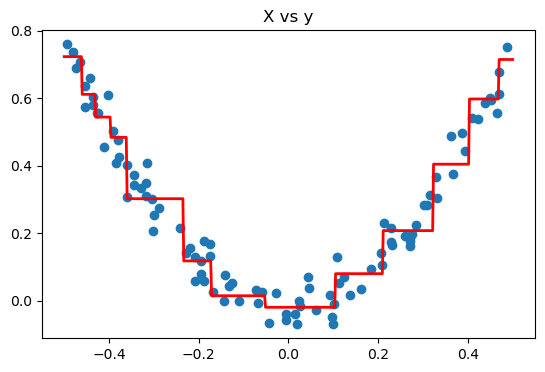

In [118]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])
plt.title('X vs y')